# Imports

In [20]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import seaborn as sns 

# check the version of these modules
print(np.__version__)
print(pickle.format_version)

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

1.23.4
4.0


# Loading data 

In [2]:
# load DE features named '1_123.npz'
data_npz = np.load('../data/1_123.npz')
print(data_npz.files)

['data', 'label']


In [3]:
# get data and label
# ** both 'data' and 'label' are pickled dict **

data = pickle.loads(data_npz['data'])
label = pickle.loads(data_npz['label'])

label_dict = {0:'Disgust', 1:'Fear', 2:'Sad', 3:'Neutral', 4:'Happy'}

print(data.keys())
print(label.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])


In [4]:
# As we can see, there are 45 keys in both 'data' and 'label'.
# Each participant took part in our experiments for 3 sessions, and he/she watched 15 movie clips (i.e. 15 trials) during each session.
# Therefore, we could extract 3 * 15 = 45 DE feature matrices.

# The key indexes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] belong to Session 1.
# The key indexes [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] belong to Session 2.
# The key indexes [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44] belong to Session 3.

# We will print the emotion labels for each trial.
label_dict = {0:'Disgust', 1:'Fear', 2:'Sad', 3:'Neutral', 4:'Happy'}
for i in range(45):
    print('Session {} -- Trial {} -- EmotionLabel : {}'.format(i//15+1, i%15+1, label_dict[label[i][0]]))

Session 1 -- Trial 1 -- EmotionLabel : Happy
Session 1 -- Trial 2 -- EmotionLabel : Fear
Session 1 -- Trial 3 -- EmotionLabel : Neutral
Session 1 -- Trial 4 -- EmotionLabel : Sad
Session 1 -- Trial 5 -- EmotionLabel : Disgust
Session 1 -- Trial 6 -- EmotionLabel : Happy
Session 1 -- Trial 7 -- EmotionLabel : Fear
Session 1 -- Trial 8 -- EmotionLabel : Neutral
Session 1 -- Trial 9 -- EmotionLabel : Sad
Session 1 -- Trial 10 -- EmotionLabel : Disgust
Session 1 -- Trial 11 -- EmotionLabel : Happy
Session 1 -- Trial 12 -- EmotionLabel : Fear
Session 1 -- Trial 13 -- EmotionLabel : Neutral
Session 1 -- Trial 14 -- EmotionLabel : Sad
Session 1 -- Trial 15 -- EmotionLabel : Disgust
Session 2 -- Trial 1 -- EmotionLabel : Sad
Session 2 -- Trial 2 -- EmotionLabel : Fear
Session 2 -- Trial 3 -- EmotionLabel : Neutral
Session 2 -- Trial 4 -- EmotionLabel : Disgust
Session 2 -- Trial 5 -- EmotionLabel : Happy
Session 2 -- Trial 6 -- EmotionLabel : Happy
Session 2 -- Trial 7 -- EmotionLabel : Disgus

# Transforming dataset 

## Transform dataset to 2D Data

In [5]:
data

{0: array([[11.08252158,  8.91598993,  7.89408803, ...,  7.07195532,
          5.65708081,  4.36150606],
        [11.08181639,  8.91510401,  7.89364634, ...,  7.07177633,
          5.6569868 ,  4.36162375],
        [11.08113882,  8.91424457,  7.89311581, ...,  7.07146188,
          5.65674597,  4.36177956],
        ...,
        [11.09093681,  8.90651219,  7.88062322, ...,  7.05494398,
          5.64746577,  4.36830008],
        [11.09181965,  8.90597236,  7.87993625, ...,  7.05439539,
          5.64685332,  4.36912144],
        [11.09237631,  8.90556688,  7.87957235, ...,  7.05379577,
          5.64648296,  4.36975357]]),
 1: array([[10.5399661 ,  8.72896013,  7.56788644, ...,  6.64791569,
          5.35431435,  4.0177257 ],
        [10.53897522,  8.72844536,  7.56761172, ...,  6.64782481,
          5.35430551,  4.01779672],
        [10.53676455,  8.72737774,  7.5674892 , ...,  6.64798877,
          5.35445815,  4.01788296],
        ...,
        [10.52582223,  8.72269758,  7.57685102, 

In [6]:
n=1 #no. of movieclip "stimulus" index 0=Happy, 1=Fear
pd.DataFrame(data[n])

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,10.539966,8.728960,7.567886,8.364595,8.554128,10.105816,8.476855,7.210753,7.212286,7.070585,...,8.762342,7.331926,6.510147,5.435035,4.420198,8.961795,7.554606,6.647916,5.354314,4.017726
1,10.538975,8.728445,7.567612,8.364309,8.554022,10.104678,8.476401,7.210501,7.212297,7.070662,...,8.761969,7.331506,6.509971,5.434931,4.420232,8.961679,7.554239,6.647825,5.354306,4.017797
2,10.536765,8.727378,7.567489,8.363710,8.554081,10.102264,8.475524,7.210345,7.212291,7.071066,...,8.761622,7.330959,6.509964,5.434805,4.420261,8.961708,7.553822,6.647989,5.354458,4.017883
3,10.533401,8.725625,7.567234,8.362806,8.554374,10.098756,8.474190,7.210142,7.212044,7.071774,...,8.761360,7.330317,6.509916,5.434762,4.420341,8.961884,7.553214,6.648322,5.354734,4.017978
4,10.529604,8.723575,7.566981,8.361852,8.554828,10.095072,8.473010,7.210065,7.211554,7.072757,...,8.761296,7.329526,6.509850,5.434917,4.420575,8.962340,7.552392,6.648699,5.355166,4.018013
5,10.526214,8.721457,7.566606,8.361039,8.555427,10.092171,8.472033,7.210041,7.211042,7.073871,...,8.761411,7.328751,6.509881,5.435238,4.420959,8.962820,7.551712,6.649132,5.355823,4.018030
6,10.523947,8.719794,7.566344,8.360308,8.556377,10.090361,8.471472,7.210333,7.210609,7.075424,...,8.761569,7.328126,6.510173,5.435795,4.421359,8.963360,7.551158,6.649731,5.356636,4.017984
7,10.522731,8.718626,7.566444,8.359680,8.557584,10.089373,8.471380,7.210992,7.210167,7.077161,...,8.761787,7.327937,6.511055,5.436570,4.421729,8.964072,7.550874,6.650964,5.357586,4.017922
8,10.522409,8.717841,7.566930,8.359000,8.558925,10.089164,8.471617,7.212096,7.209634,7.078889,...,8.762398,7.327830,6.512069,5.437696,4.422110,8.965281,7.550753,6.652553,5.358773,4.017849
9,10.521663,8.716870,7.567474,8.358271,8.560412,10.088743,8.471802,7.213332,7.209112,7.080831,...,8.763135,7.327488,6.513192,5.438787,4.422431,8.966755,7.550586,6.654505,5.359869,4.017712


In [7]:
pd.DataFrame(label[n])

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


<AxesSubplot:>

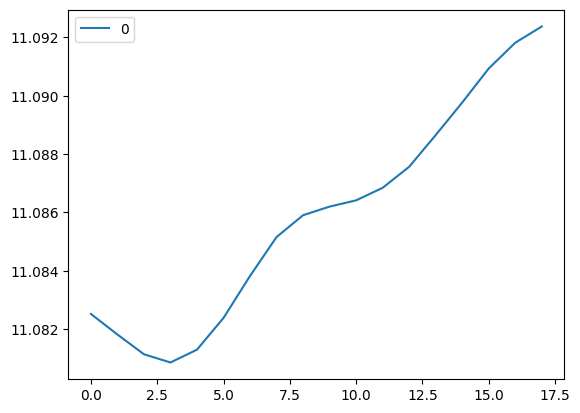

In [8]:
zero=(pd.DataFrame(data[0].T[0]))
zero.plot()

In [9]:
pd.DataFrame(data[0]).shape[0]

18

In [10]:
#Meaning of the observations within a stimulus
#Session 1 start/end seconds

start_second= [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
end_second= [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]
duration=[]
min_per_segment=[]
for i in range(15):
    duration.append(end_second[i]-start_second[i])
for i in range(15):
    min_per_segment.append(duration[i]//(pd.DataFrame(data[i]).shape[0]))
#print(duration)
print(min_per_segment)

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [11]:
pd.DataFrame(data[0])

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,8.720063,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,8.719947,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,8.719872,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,8.719701,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,8.719669,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404
5,11.082385,8.914133,7.893591,8.395986,8.574627,10.450640,8.680702,7.425287,6.835468,6.428375,...,8.719719,7.481358,6.884889,5.474986,4.248107,8.840121,7.732843,7.068976,5.655815,4.362619
6,11.083825,8.914366,7.893565,8.396130,8.573922,10.451684,8.681255,7.425670,6.835498,6.427334,...,8.719999,7.480719,6.883047,5.474118,4.247806,8.841397,7.732290,7.067766,5.655584,4.362830
7,11.085158,8.914192,7.892964,8.395734,8.572777,10.452605,8.681552,7.425420,6.834936,6.425751,...,8.720617,7.480014,6.881331,5.473169,4.247491,8.842948,7.731709,7.066447,5.655036,4.363043
8,11.085906,8.913450,7.891825,8.394749,8.571212,10.452949,8.681341,7.424560,6.833846,6.423801,...,8.721225,7.479337,6.879698,5.472189,4.247235,8.844387,7.731218,7.065100,5.654262,4.363255
9,11.086201,8.911913,7.890041,8.393327,8.569228,10.452640,8.680249,7.422915,6.832204,6.421476,...,8.721410,7.478602,6.877927,5.471179,4.247170,8.845474,7.730684,7.063503,5.653381,4.363512


In [12]:
nbatch=10
test=[i for i in range(45) if i%15-1<nbatch
]

Xtrainframes1 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes1 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes2 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes2 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes3 = [pd.DataFrame(data[i]) for i in range(nbatch)]
ytrainframes3 = [pd.DataFrame(label[i]) for i in range(nbatch)]

Xtrainframes1
ytrainframes1


[      0
 0   4.0
 1   4.0
 2   4.0
 3   4.0
 4   4.0
 5   4.0
 6   4.0
 7   4.0
 8   4.0
 9   4.0
 10  4.0
 11  4.0
 12  4.0
 13  4.0
 14  4.0
 15  4.0
 16  4.0
 17  4.0,
       0
 0   1.0
 1   1.0
 2   1.0
 3   1.0
 4   1.0
 5   1.0
 6   1.0
 7   1.0
 8   1.0
 9   1.0
 10  1.0
 11  1.0
 12  1.0
 13  1.0
 14  1.0
 15  1.0
 16  1.0
 17  1.0
 18  1.0
 19  1.0
 20  1.0
 21  1.0
 22  1.0
 23  1.0,
       0
 0   3.0
 1   3.0
 2   3.0
 3   3.0
 4   3.0
 5   3.0
 6   3.0
 7   3.0
 8   3.0
 9   3.0
 10  3.0
 11  3.0
 12  3.0
 13  3.0
 14  3.0
 15  3.0
 16  3.0
 17  3.0
 18  3.0
 19  3.0
 20  3.0
 21  3.0
 22  3.0
 23  3.0
 24  3.0
 25  3.0
 26  3.0
 27  3.0
 28  3.0
 29  3.0
 30  3.0
 31  3.0
 32  3.0
 33  3.0
 34  3.0
 35  3.0
 36  3.0
 37  3.0
 38  3.0
 39  3.0
 40  3.0
 41  3.0
 42  3.0
 43  3.0
 44  3.0
 45  3.0
 46  3.0
 47  3.0
 48  3.0
 49  3.0
 50  3.0
 51  3.0
 52  3.0
 53  3.0
 54  3.0
 55  3.0
 56  3.0
 57  3.0
 58  3.0,
       0
 0   2.0
 1   2.0
 2   2.0
 3   2.0
 4   2.0
 5   2.

In [13]:
#train=[i for i in range(45) if i%15-1<nbatch] = [0-9,15-24,30-39]
#test [i for i in range(45) if i%15>nbatch = [10-14, 25-29, 40-44]

Xtrainframes = [pd.DataFrame(data[i]) for i in range(45) if i%15-1<nbatch]
X_train = pd.concat(Xtrainframes)
X_train

,0,1,2,3,4,5,6,7,8,9,...,300,301,302,303,304,305,306,307,308,309
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,8.720063,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,8.719947,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,8.719872,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,8.719701,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,8.719669,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,9.499406,7.991391,6.844810,6.553275,6.294816,9.352242,7.927543,6.708832,6.170524,5.422403,...,8.466880,7.410260,6.552172,5.027985,3.471128,8.821498,7.547371,6.668602,4.990408,3.164480
51,9.498189,7.991151,6.844440,6.552328,6.295486,9.352392,7.926881,6.708460,6.170404,5.421682,...,8.466099,7.409258,6.552594,5.027852,3.468664,8.820249,7.546636,6.668892,4.990567,3.163734
52,9.497426,7.991078,6.844154,6.551759,6.295893,9.353167,7.926564,6.708162,6.170268,5.421028,...,8.465659,7.408757,6.553157,5.027926,3.466734,8.819575,7.546467,6.669305,4.990927,3.163216
53,9.496995,7.991322,6.843753,6.551410,6.295985,9.354135,7.926953,6.707824,6.170233,5.420544,...,8.465515,7.408669,6.553575,5.028000,3.465382,8.819270,7.546691,6.669665,4.991254,3.162977


In [14]:
nbatch=10
Xtrainframes=[]
ytrainframes=[]
for i in range(45):
    if i%15-1<nbatch:
        Xtrainframes.append(pd.DataFrame(data[i]))
    if i%15>nbatch:
        ytrainframes.append(pd.DataFrame(data[i]))

In [15]:
trainframes=[]
testframes=[]
for i in range(45):
    if i%15-1<nbatch:
        trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    if i%15>nbatch:
        testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))

In [16]:
#
train = pd.concat(trainframes)
test  = pd.concat(testframes)
train.shape, test.shape

((1343, 311), (480, 311))

In [26]:
# rename df target 
train.columns = [*train.columns[:-1], 'target']
train

,0,1,2,3,4,5,6,7,8,9,...,301,302,303,304,305,306,307,308,309,target
0,11.082522,8.915990,7.894088,8.393629,8.576055,10.450283,8.682803,7.425018,6.833982,6.431147,...,7.484101,6.889748,5.478040,4.247615,8.838729,7.736448,7.071955,5.657081,4.361506,4.0
1,11.081816,8.915104,7.893646,8.393852,8.575908,10.449770,8.681773,7.424501,6.833948,6.430860,...,7.483864,6.889452,5.477954,4.247919,8.838477,7.736124,7.071776,5.656987,4.361624,4.0
2,11.081139,8.914245,7.893116,8.394334,8.575671,10.449391,8.680753,7.424007,6.834211,6.430407,...,7.483311,6.888881,5.477563,4.248155,8.838380,7.735444,7.071462,5.656746,4.361780,4.0
3,11.080857,8.913749,7.893061,8.394893,8.575294,10.449425,8.680200,7.424111,6.834612,6.429797,...,7.482540,6.887955,5.476832,4.248294,8.838502,7.734421,7.070929,5.656415,4.362126,4.0
4,11.081297,8.913816,7.893386,8.395509,8.575009,10.449813,8.680219,7.424706,6.835073,6.429158,...,7.481893,6.886515,5.475891,4.248291,8.839146,7.733523,7.069984,5.656045,4.362404,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,9.499406,7.991391,6.844810,6.553275,6.294816,9.352242,7.927543,6.708832,6.170524,5.422403,...,7.410260,6.552172,5.027985,3.471128,8.821498,7.547371,6.668602,4.990408,3.164480,3.0
51,9.498189,7.991151,6.844440,6.552328,6.295486,9.352392,7.926881,6.708460,6.170404,5.421682,...,7.409258,6.552594,5.027852,3.468664,8.820249,7.546636,6.668892,4.990567,3.163734,3.0
52,9.497426,7.991078,6.844154,6.551759,6.295893,9.353167,7.926564,6.708162,6.170268,5.421028,...,7.408757,6.553157,5.027926,3.466734,8.819575,7.546467,6.669305,4.990927,3.163216,3.0
53,9.496995,7.991322,6.843753,6.551410,6.295985,9.354135,7.926953,6.707824,6.170233,5.420544,...,7.408669,6.553575,5.028000,3.465382,8.819270,7.546691,6.669665,4.991254,3.162977,3.0


In [ ]:
#Split Data Function
def splitdata(data, label, ntrainbatch):
    nbatch=ntrainbatch-1
    trainframes=[]
    testframes =[]
    for i in range(45):
        if i%15-1<nbatch:
            trainframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
        if i%15>nbatch:
            testframes.append(pd.concat([pd.DataFrame(data[i]), pd.DataFrame(label[i])], axis=1))
    train = pd.concat(trainframes)
    test  = pd.concat(testframes)
    return train, test

## Transforming dataset to 3D dataset

# Preprocessing of data 

In [ ]:
X_train = train.drop(['target'], axis=1)
y_train = train['target']

In [33]:
# scaling of the dataset 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

array([[ 1.11987111,  0.72002538,  0.74006598, ...,  0.83224941,
         0.83753213,  0.72953405],
       [ 1.11899593,  0.7185817 ,  0.73945822, ...,  0.83184792,
         0.83731866,  0.72969589],
       [ 1.11815504,  0.71718117,  0.73872823, ...,  0.83114256,
         0.8367718 ,  0.72991014],
       ...,
       [-0.84730867, -0.78719794, -0.70462227, ..., -0.07094613,
        -0.67511227, -0.91815414],
       [-0.84784431, -0.78679991, -0.70517349, ..., -0.07013784,
        -0.67436853, -0.91848377],
       [-0.84760224, -0.78612553, -0.70570979, ..., -0.06940248,
        -0.67359238, -0.91857713]])

In [ ]:
# use feature permutation in order to check the relevance of the features 

# Modelling 

## Baseline Model: SVM 

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', C=10)

# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = svc.predict(X_test)

# Evaluate the accuracy of the classifier
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

SVC(C=10, kernel='linear')

## RNN / CNN 